# Targeted analysis

## .txt -> df

In [96]:
import numpy as np
import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as m

In [104]:
#path + file = filename, so writs start w filename
filename = "C:/Users/Marilyn/Desktop/200929s001.txt"

In [151]:
df_cols = ["scannumber", "time", "intensity", "m_over_z"]
df = []

n_scans = 0
for line in open(filename, "r"):
    if "ScanHeader" in line:
        n_scans = int(line.split("#")[1].strip())
print(f"There are {n_scans} rts")

current_scan = 0
for line in open(filename, "r"):
    if "ScanHeader" in line:
        current_scan = int(line.split("#")[1].strip())
        print(f"{current_scan}/{n_scans}")
    if "start_time" in line:
        time = str(line.split(", ")[0].strip())
        time = float(time.split("= ")[1].strip())
    if ' intensity =' in line:
        _, intensity, m_over_z = line.split(",")
        intensity = float(intensity.replace("intensity = ", "").strip())
        m_over_z = float(m_over_z.replace("mass/position = ", "").strip())
        df.append([
            current_scan,
            time,
            intensity,
            m_over_z
        ])

There are 1273 rts
1/1273
2/1273
3/1273
4/1273
5/1273
6/1273
7/1273
8/1273
9/1273
10/1273
11/1273
12/1273
13/1273
14/1273
15/1273
16/1273
17/1273
18/1273
19/1273
20/1273
21/1273
22/1273
23/1273
24/1273
25/1273
26/1273
27/1273
28/1273
29/1273
30/1273
31/1273
32/1273
33/1273
34/1273
35/1273
36/1273
37/1273
38/1273
39/1273
40/1273
41/1273
42/1273
43/1273
44/1273
45/1273
46/1273
47/1273
48/1273
49/1273
50/1273
51/1273
52/1273
53/1273
54/1273
55/1273
56/1273
57/1273
58/1273
59/1273
60/1273
61/1273
62/1273
63/1273
64/1273
65/1273
66/1273
67/1273
68/1273
69/1273
70/1273
71/1273
72/1273
73/1273
74/1273
75/1273
76/1273
77/1273
78/1273
79/1273
80/1273
81/1273
82/1273
83/1273
84/1273
85/1273
86/1273
87/1273
88/1273
89/1273
90/1273
91/1273
92/1273
93/1273
94/1273
95/1273
96/1273
97/1273
98/1273
99/1273
100/1273
101/1273
102/1273
103/1273
104/1273
105/1273
106/1273
107/1273
108/1273
109/1273
110/1273
111/1273
112/1273
113/1273
114/1273
115/1273
116/1273
117/1273
118/1273
119/1273
120/1273
121/1273


In [152]:
df = pd.DataFrame(df, columns=df_cols)
df.head()

,scannumber,time,intensity,m_over_z
0,1,0.006882,0.0,52.869404
1,1,0.006882,0.0,52.869450
2,1,0.006882,0.0,52.869496
3,1,0.006882,0.0,52.869541
4,1,0.006882,0.0,53.608427


In [153]:
#name file wo path
file = filename.split("/")[-1]
file = file.split(".")[0]
file #ok

'200929s001'

In [ ]:
#path
path = filename.split("/")[0:-1]
path = '/'.join(path) + "/"
#print(path) 

In [154]:
new_filename = "df_" + file +".txt"
df.to_csv(new_filename, header=df_cols, index=None, sep='\t', mode='a')

In [145]:
df.head(10)
#df2.tail(10)
df2.shape

,scannumber,time,intensity,m_over_z
0,1,0.006882,0.000000,52.869404
1,1,0.006882,0.000000,52.869450
2,1,0.006882,0.000000,52.869496
3,1,0.006882,0.000000,52.869541
4,1,0.006882,0.000000,53.608427
5,1,0.006882,0.000000,53.608473
6,1,0.006882,0.000000,53.608520
7,1,0.006882,0.000000,53.608566
8,1,0.006882,233.530991,53.608613
9,1,0.006882,416.663635,53.608660


In [107]:
df_file = df

In [101]:
#alternative start from here
#df_filename = "C:/Users/Marilyn/Desktop/df_200929s0001.txt"

In [102]:
#df_file = pd.read_csv(df_filename, sep='\t')

In [103]:
#df_file.head()

,scannumber,time,intensity,m_over_z
0,1,0.007044,0.0,52.869336
1,1,0.007044,0.0,52.869382
2,1,0.007044,0.0,52.869427
3,1,0.007044,0.0,52.869473
4,1,0.007044,0.0,55.133317


## df -> image

In [108]:
INPUT_STANDARDS = "C:/Users/Marilyn/Desktop/targetedMetadata2.txt"

In [109]:
df = pd.read_csv(INPUT_STANDARDS, sep='\t')

In [110]:
df.head()

,ID,Metabolite,Class (HMDB),subclass (HMDB),class (old classification),Chemical formula,Ionisation mode,Theoretical m/z (Da) [M-H]-,Theoretical m/z (Da) [M+H]+,Theoretical m/z (Da) [M+Na]+,...,Retention time (min),Average variation retention time (%),Initial retention time (min),Retention time (min) 7/09/2018,Retention time (min) 10/06/2020,Retention time (min) after tests,retention time remarks,Xcalibur Layout,Standard mixture number,standard mixture remarks
0,ID073,L-(+)-Lactic acid,hydroxy acid,Alpha hydroxy acids and derivatives,Hydroxylzuren,C3H6O3,-,89.02442,91.03897,NaN,...,1.5,NaN,1,NaN,1.5,NaN,89.02285,1 deel 5,oplossing 1,NaN


In [111]:
df_cols = ["ID", "Metabolite", "Ionisation mode", "Emperical m/z (Da)", "Retention time (min)"]
df = df.loc[:, df_cols]
df.head()

,ID,Metabolite,Ionisation mode,Emperical m/z (Da),Retention time (min)
0,ID073,L-(+)-Lactic acid,-,89.02442,1.5


In [112]:
#for line in df:
line = 0   #for testing
standard = df.loc[line, df_cols]

In [113]:
standard #ok

ID                                  ID073
Metabolite              L-(+)-Lactic acid
Ionisation mode                         -
Emperical m/z (Da)                89.0244
Retention time (min)                  1.5
Name: 0, dtype: object

In [114]:
df_file.tail()

,scannumber,time,intensity,m_over_z
14527281,1273,18.020203,0.0,797.645179
14527282,1273,18.020203,0.0,808.062184
14527283,1273,18.020203,0.0,808.064907
14527284,1273,18.020203,0.0,808.067630
14527285,1273,18.020203,0.0,808.070353


In [115]:
#search scan number and only retain 1 ionisation mode
#column with scannumber must be present as 1st collumn = stopifnot add todo

if(standard["Ionisation mode"] == '-'):
    ##positive mode = odd -> 1, negative = even -> 0
    df_file = df_file[df_file["scannumber"] % 2 == 0]
if(standard["Ionisation mode"] == '+'):
    df_file = df_file[df_file["scannumber"] % 2 == 1]

In [116]:
#len(df_file)
df_file.head() #ok

,scannumber,time,intensity,m_over_z
1404,2,0.021836,0.0,52.870268
1405,2,0.021836,0.0,52.870314
1406,2,0.021836,0.0,52.870359
1407,2,0.021836,0.0,52.870405
1408,2,0.021836,0.0,54.904641


In [117]:
### make block (big)
## rt keep all
## mz keep +- 0.2 Da arround center
  
standard_down = standard["Emperical m/z (Da)"] - 0.02 #max mz-dev bij 1200 da is 1.012/1.019 bij 5/8 ppm
standard_up = standard["Emperical m/z (Da)"] + 0.02

In [118]:
print(standard_down, standard_up) #ok

89.00442 89.04441999999999


In [119]:
roi = df_file[(df_file["m_over_z"] >= standard_down) & (df_file["m_over_z"] <= standard_up)]

In [120]:
roi.head() #ok
len(roi)

12677

In [121]:
#approx mz
#mz 0.0001 round
#approx rt
#0.01: steeds zelfde scannr dus zeker geen probleem
roi = roi.round({'m_over_z': 4, 'time': 2})

In [122]:
#order from low to high rt
roi = roi.sort_values('time')

In [123]:
roi.head()

,scannumber,time,intensity,m_over_z
69518,36,0.54,0.0,89.0216
69541,36,0.54,0.0,89.0239
69540,36,0.54,0.0,89.0238
69539,36,0.54,0.0,89.0237
69538,36,0.54,0.0,89.0236


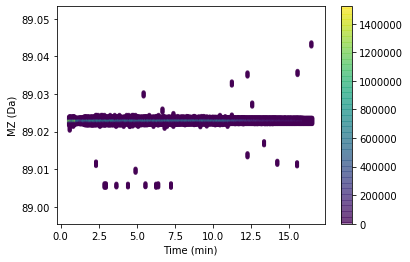

In [125]:
#plot
plt.figure()
plt.scatter(
    x=roi.time, 
    y=roi.m_over_z,
    marker='.',
    c=roi.intensity, 
    alpha=0.5
)
plt.colorbar()
plt.ylabel("MZ (Da)")
plt.xlabel("Time (min)")
plt.show()
#plt.savefig(file + "_" + standard["ID"] + '.png')

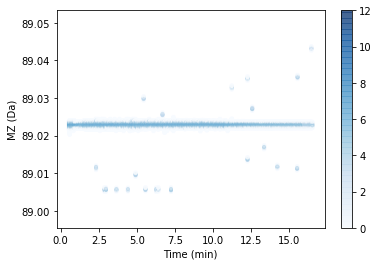

In [160]:
#plot + log
plt.figure()
plt.scatter(
    x=roi.time, 
    y=roi.m_over_z,
    marker='.',
    c=np.log10(roi.intensity+1), 
    alpha=0.5,
    vmin=0, 
    vmax=12,
    cmap=plt.cm.Blues
)

plt.colorbar()
plt.ylabel("MZ (Da)")
plt.xlabel("Time (min)")
plt.show()
#plt.savefig(file + "_" + standard["ID"] + '.png')

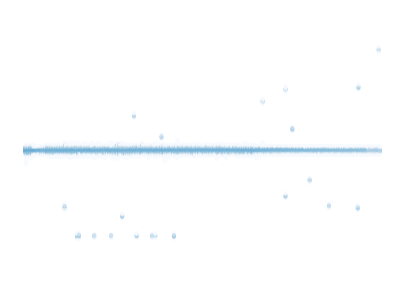

In [162]:
#plot + log
plt.figure(
    figsize=(7, 5)
)
plt.scatter(
    x=roi.time, 
    y=roi.m_over_z,
    marker='.',
    c=np.log10(roi.intensity+1), 
    alpha=0.5,
    vmin=0, 
    vmax=12,
    cmap=plt.cm.Blues
)

plt.axis('off')
#plt.colorbar()
#plt.ylabel("MZ (Da)")
#plt.xlabel("Time (min)")
#plt.show()
plt.savefig(file + "_" + standard["ID"] + '.png')

In [127]:
#make pivot table 

In [128]:
retained_cols = ["time", "intensity", "m_over_z"]
data = np.array(roi[retained_cols])
data[1]

array([ 0.54  ,  0.    , 89.0239])

In [129]:
#def pivot_table(data):
rows, row_pos = np.unique(data[:,0], return_inverse=True) #time
cols, col_pos = np.unique(data[:,2], return_inverse=True) #mz

pivot_table = np.zeros((len(rows), len(cols)), dtype=data.dtype)
pivot_table[row_pos, col_pos] = data[:, 1] #intensity
#    return pivot_table

In [130]:
#pivot_table = pivot_table(data)

In [131]:
pivot_table.shape

(571, 200)

In [132]:
rows = np.unique(data[:,0])
cols = np.unique(data[:,2])
print(len(rows), len(cols))

571 200


In [133]:
df_pivot = pd.DataFrame(pivot_table, columns=cols, index=rows)
df_pivot.head()
#df_pivot.shape

,89.0050,89.0051,89.0052,89.0053,89.0054,89.0055,89.0056,89.0057,89.0058,89.0059,...,89.0429,89.0430,89.0431,89.0432,89.0433,89.0434,89.0435,89.0436,89.0437,89.0438
0.54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [134]:
new_filename = file + "_" + standard["ID"] + "_pivot.txt"
df_pivot.to_csv(new_filename, index=True, header=True, sep='\t', mode='a')
#new_filename #ok

In [135]:
Tdf_pivot = df_pivot.transpose()

<Figure size 432x288 with 0 Axes>

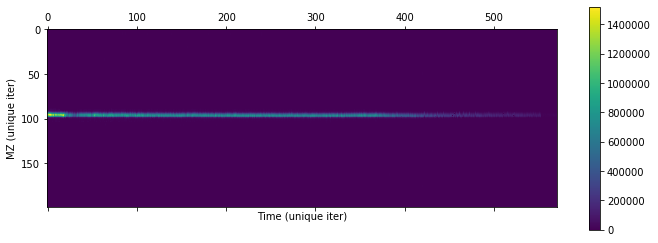

In [136]:
plt.figure()
plt.matshow(Tdf_pivot)

plt.colorbar()
plt.ylabel("MZ (unique iter)")
plt.xlabel("Time (unique iter)")

plt.show()

In [137]:
#log pivot + transpose for png
log_pivot = np.log10(df_pivot+1)
Tlog_pivot = log_pivot.transpose() #transpose back
log_pivot.head()

,89.0050,89.0051,89.0052,89.0053,89.0054,89.0055,89.0056,89.0057,89.0058,89.0059,...,89.0429,89.0430,89.0431,89.0432,89.0433,89.0434,89.0435,89.0436,89.0437,89.0438
0.54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [138]:
new_filename = file + "_" + standard["ID"] + "_LogPivot.txt"
log_pivot.to_csv(new_filename, index=True, header=True, sep='\t', mode='a')

In [139]:
#log_pivot.index
#log_pivot.columns

<Figure size 432x288 with 0 Axes>

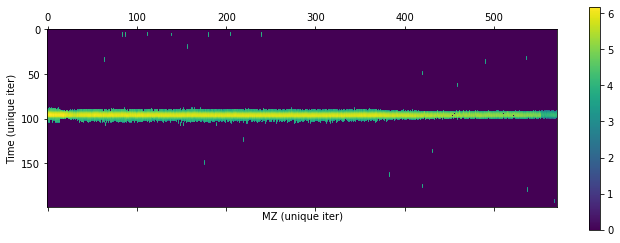

In [140]:
plt.figure()
plt.matshow(Tlog_pivot)

plt.colorbar()
plt.xlabel("MZ (unique iter)")
plt.ylabel("Time (unique iter)")

plt.show()

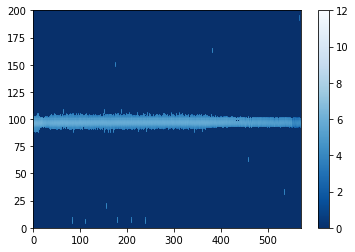

In [141]:
#plot w fixed colour
plt.figure()
plt.pcolor(Tlog_pivot, cmap=plt.cm.Blues_r, vmin=0, vmax=12)
plt.colorbar()
plt.show()

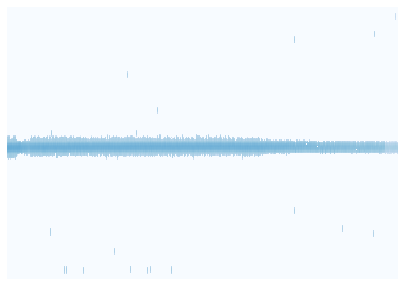

In [157]:
plt.figure(
    figsize=(7, 5)
)
plt.pcolor(Tlog_pivot, cmap=plt.cm.Blues, vmin=0, vmax=12) #print(m.cm.cmap_d.keys())
plt.axis('off')
#plt.show()
plt.savefig(file + "_" + standard["ID"] + '_pivot.png')

### extra

In [ ]:
'''#ev ooit 3D plot
#https://stackoverflow.com/questions/9170838/surface-plots-in-matplotlib
#a,x,y,z = np.loadtxt("C:/Users/Marilyn/Desktop/df_200929s046.txt", unpack=True) #fix??
fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_trisurf(x, y, z, cmap=cm.jet, linewidth=0.1)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig('teste.pdf')
plt.show()
'''